In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath="I:/datasets/laptops_train.csv"
#filepath="/content/drive/MyDrive/Colab Notebooks/Portfolio/laptops_train.csv"
train = pd.read_csv(filepath, header=0)
filepath="I:/datasets/laptops_test.csv"
#filepath="/content/drive/MyDrive/Colab Notebooks/Portfolio/laptops_test.csv"
test= pd.read_csv(filepath, header=0)

In [3]:
print(train.shape)
print(test.shape)

(977, 13)
(325, 13)


Os dados foram separados em 80% para treino e 20% para teste

Vou concatenar os dados de treino e teste em um único dataframe, assim posso preparar o conjunto de dados

In [4]:
df=pd.concat([train,test]).reset_index(drop=True)

In [5]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


Procurar por dados duplicados e tratar deles

In [6]:
df.duplicated().sum()

28

In [7]:
#Como são poucos, vou apagá-los
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1274, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1274 non-null   object 
 1   Model Name                1274 non-null   object 
 2   Category                  1274 non-null   object 
 3   Screen Size               1274 non-null   object 
 4   Screen                    1274 non-null   object 
 5   CPU                       1274 non-null   object 
 6   RAM                       1274 non-null   object 
 7    Storage                  1274 non-null   object 
 8   GPU                       1274 non-null   object 
 9   Operating System          1274 non-null   object 
 10  Operating System Version  1108 non-null   object 
 11  Weight                    1274 non-null   object 
 12  Price                     1274 non-null   float64
dtypes: float64(1), object(12)
memory usage: 139.3+ KB


In [10]:
df.describe(include=object)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
count,1274,1274,1274,1274,1274,1274,1274,1274,1274,1274,1108,1274
unique,19,617,6,18,40,118,9,38,110,7,4,179
top,Dell,XPS 13,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,2.2kg
freq,291,30,707,646,505,190,613,412,279,1100,1047,117


In [11]:
df.describe()

,Price
count,1.274000e+03
mean,1.008751e+07
std,6.231339e+06
min,1.547208e+06
25%,5.415228e+06
50%,8.789742e+06
75%,1.329354e+07
max,5.423231e+07


# AED

Os únicos dados faltantes são da variável "Operating System Version"

In [12]:
df['Operating System Version'].isnull().sum()

166

São 166 dados faltantes, vou substituir esses valores NaN pelo valor com maior frequência

In [13]:
df['Operating System Version'] = df['Operating System Version'].fillna(df['Operating System Version'].value_counts().idxmax())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1274 non-null   object 
 1   Model Name                1274 non-null   object 
 2   Category                  1274 non-null   object 
 3   Screen Size               1274 non-null   object 
 4   Screen                    1274 non-null   object 
 5   CPU                       1274 non-null   object 
 6   RAM                       1274 non-null   object 
 7    Storage                  1274 non-null   object 
 8   GPU                       1274 non-null   object 
 9   Operating System          1274 non-null   object 
 10  Operating System Version  1274 non-null   object 
 11  Weight                    1274 non-null   object 
 12  Price                     1274 non-null   float64
dtypes: float64(1), object(12)
memory usage: 139.3+ KB


In [15]:
df.rename(columns = {' Storage':'Storage'}, inplace = True)
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

Vamos criar uma função para plotar os gráficos

In [16]:
def countplot(feature, Title, height):
    width = 15
    plt.figure(figsize=(width, height))

    ax = sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='muted')
    # Adicionar os valores das contagens ao lado das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}',
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')

    plt.xlim(right=ax.get_xlim()[1] * 1.1)
    plt.title(Title)
    plt.xlabel('Número total')
    plt.show()
    plt.close()

### Manufacturer

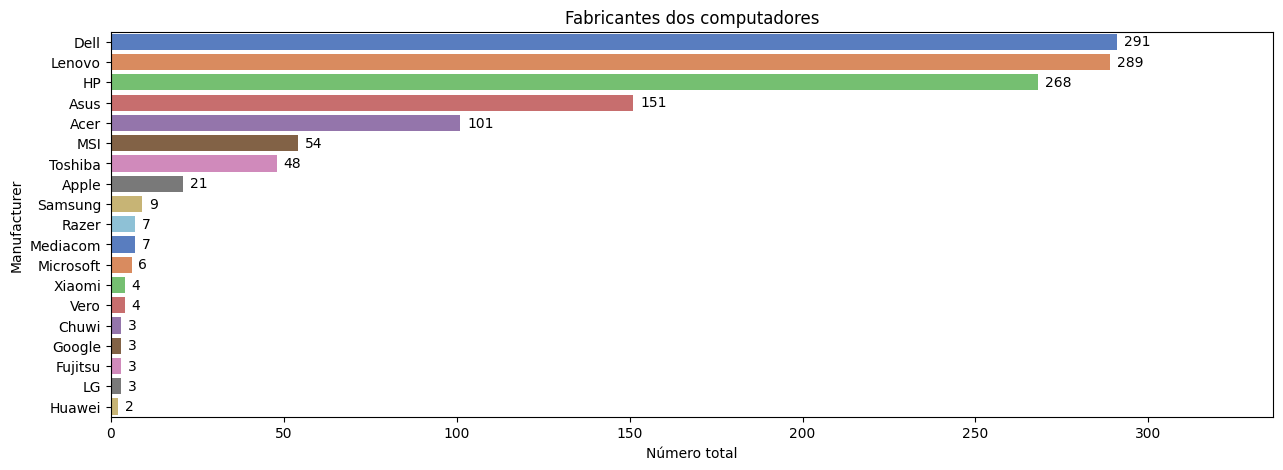

In [17]:
countplot('Manufacturer','Fabricantes dos computadores', 5)
#plt.title('Fabricantes dos computadores')
#sns.countplot(y=df['Manufacturer'], order=df['Manufacturer'].value_counts().index, palette='muted')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

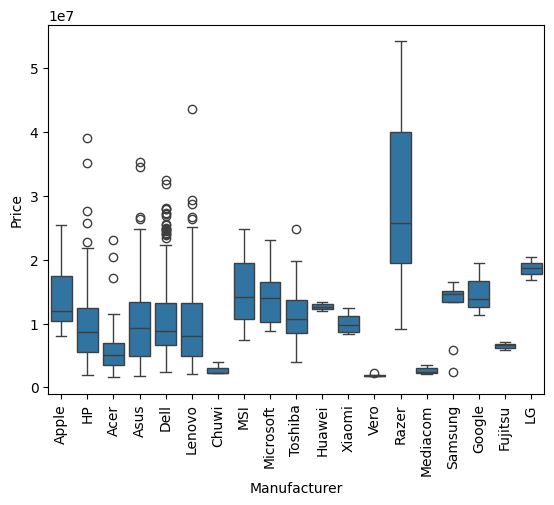

In [18]:
sns.boxplot(x='Manufacturer', y='Price', data=df)
plt.xticks(rotation='vertical')

### Model Name

Não vou considerar Model Name pois a informação contida aqui refere-se mais a uma escolha de marketing do fabricante

In [19]:
df.drop('Model Name', axis=1, inplace=True)

### Category

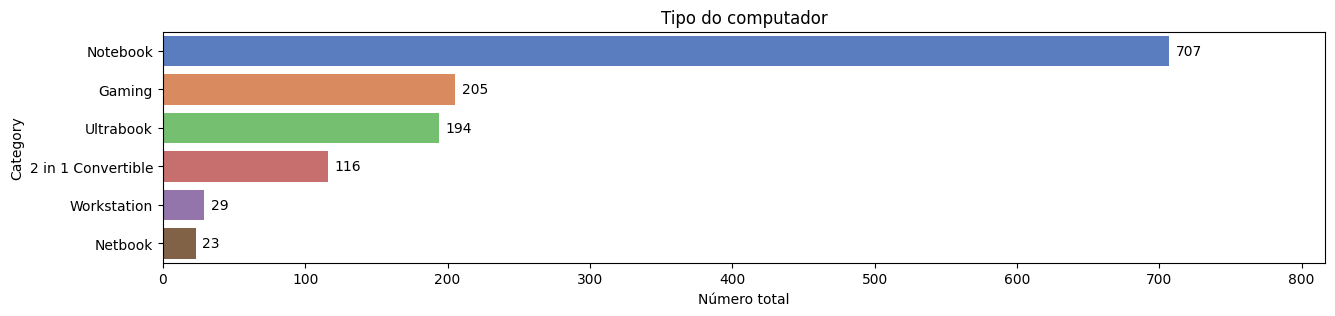

In [20]:
countplot('Category','Tipo do computador',3)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

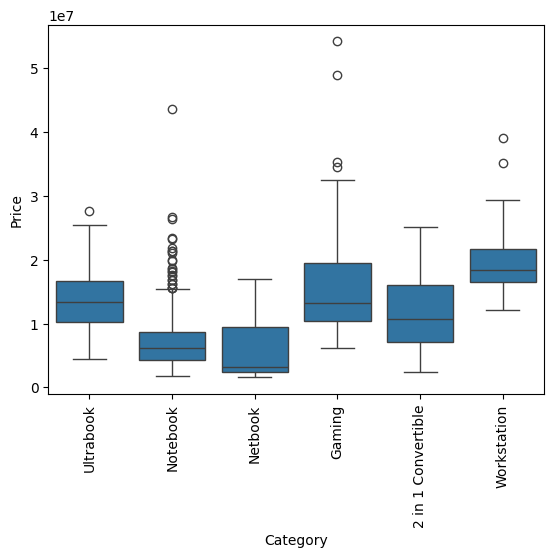

In [21]:
sns.boxplot(x='Category', y='Price', data=df)
plt.xticks(rotation='vertical')

### Screen Size

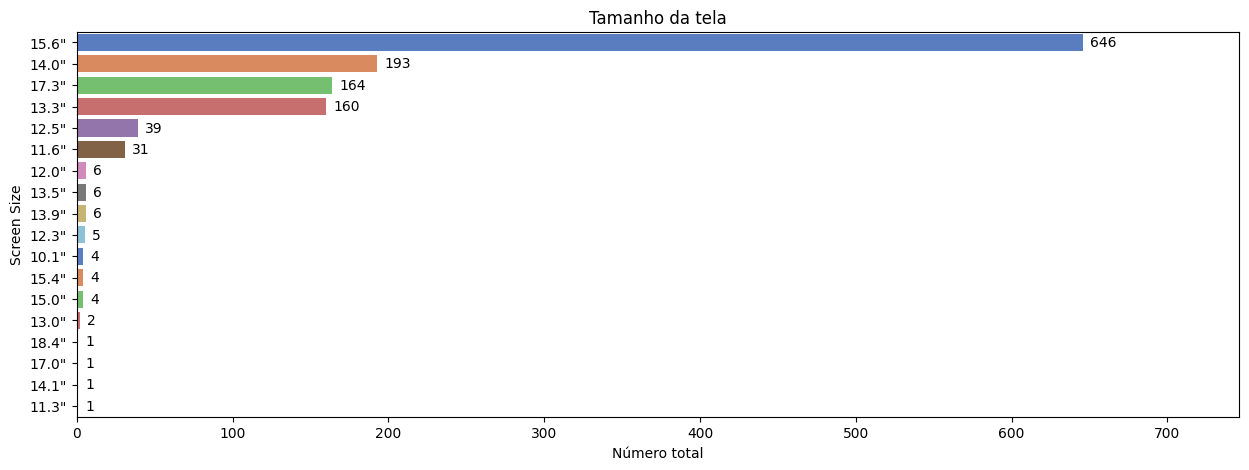

In [22]:
countplot('Screen Size','Tamanho da tela',5)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '13.3"'),
  Text(1, 0, '15.6"'),
  Text(2, 0, '15.4"'),
  Text(3, 0, '14.0"'),
  Text(4, 0, '12.0"'),
  Text(5, 0, '11.6"'),
  Text(6, 0, '17.3"'),
  Text(7, 0, '10.1"'),
  Text(8, 0, '13.5"'),
  Text(9, 0, '12.5"'),
  Text(10, 0, '13.0"'),
  Text(11, 0, '18.4"'),
  Text(12, 0, '13.9"'),
  Text(13, 0, '12.3"'),
  Text(14, 0, '17.0"'),
  Text(15, 0, '15.0"'),
  Text(16, 0, '14.1"'),
  Text(17, 0, '11.3"')])

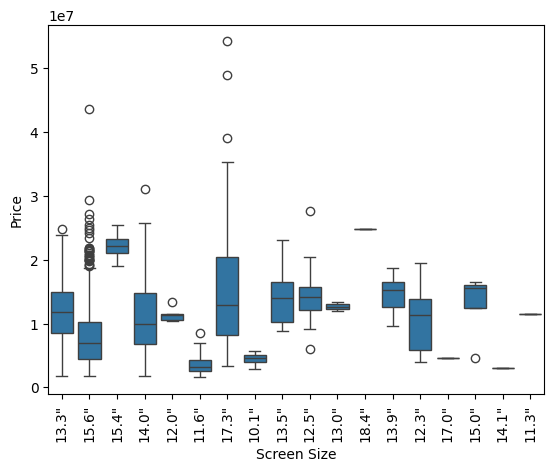

In [23]:
sns.boxplot(x='Screen Size', y='Price', data=df)
plt.xticks(rotation='vertical')

Para o modelo de previsão melhor tratar esses dados, precisamos retirar a unidade de medida de polegadas " e transformar para float

In [24]:
df['Screen Size']=df['Screen Size'].str.replace('"','').astype('float')

### Screen

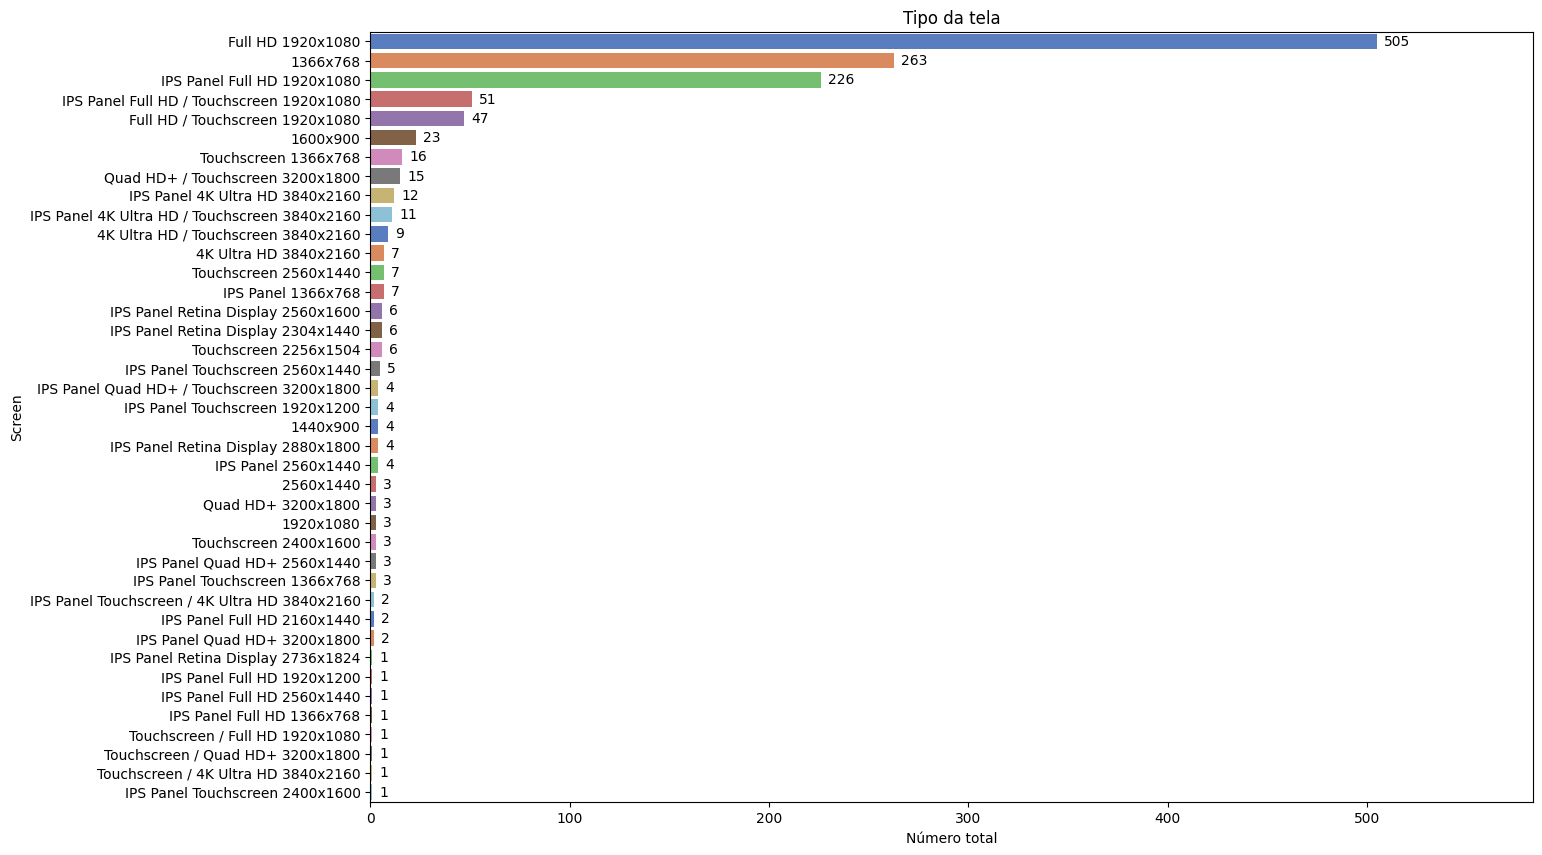

In [25]:
countplot('Screen','Tipo da tela',10)

São três informações principais que essa categoria carrega. Se a tela é Touch, IPS e o tamanho da tela. Vamos separar essas informações em novas colunas no Dataframe

In [26]:
#Para o touch
df['Touchscreen'] = df['Screen'].str.contains('touchscreen', case=False).astype('int')
#Para IPS
df['Ips'] = df['Screen'].str.contains('ips',case=False).astype('int')
#Para os pixels - str.extract(r'(\d+x\d+)') extrai da strig \d 'um número' + x + \d 'um número'
df['Pixels'] = df['Screen'].str.extract(r'(\d+x\d+)')

In [27]:
df.drop('Screen', axis=1, inplace=True)

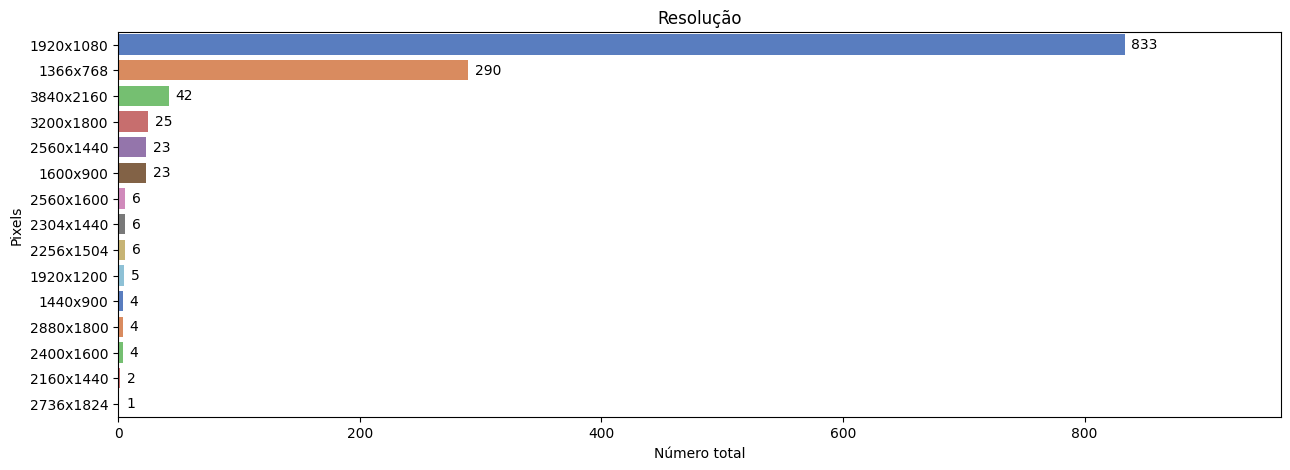

In [28]:
countplot('Pixels','Resolução',5)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2560x1600'),
  Text(1, 0, '1440x900'),
  Text(2, 0, '1920x1080'),
  Text(3, 0, '2880x1800'),
  Text(4, 0, '1366x768'),
  Text(5, 0, '2304x1440'),
  Text(6, 0, '3200x1800'),
  Text(7, 0, '1920x1200'),
  Text(8, 0, '2256x1504'),
  Text(9, 0, '3840x2160'),
  Text(10, 0, '2160x1440'),
  Text(11, 0, '2560x1440'),
  Text(12, 0, '1600x900'),
  Text(13, 0, '2736x1824'),
  Text(14, 0, '2400x1600')])

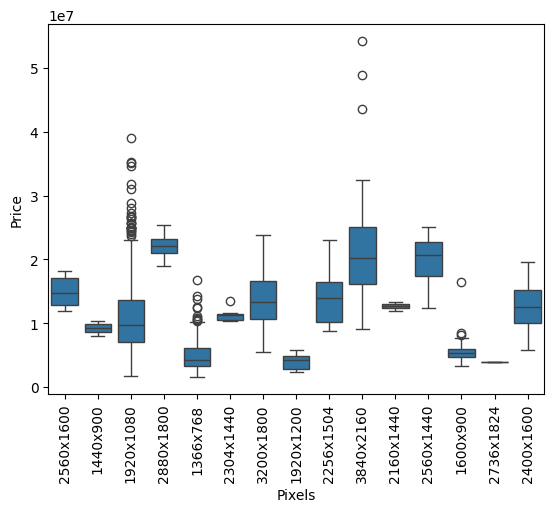

In [29]:
sns.boxplot(x='Pixels', y='Price', data=df)
plt.xticks(rotation='vertical')

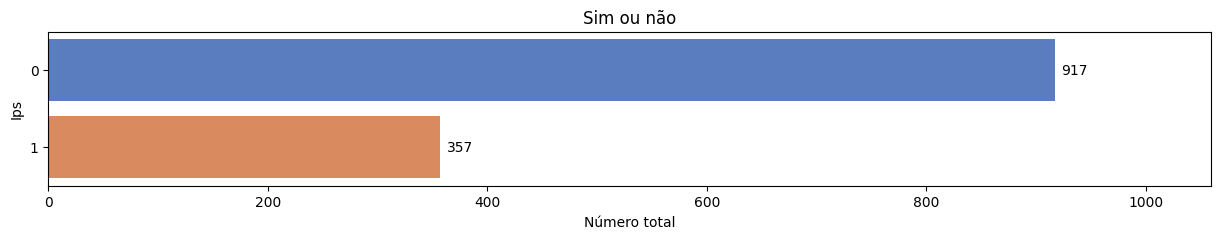

In [30]:
countplot('Ips','Sim ou não',2)

<Axes: xlabel='Ips', ylabel='Price'>

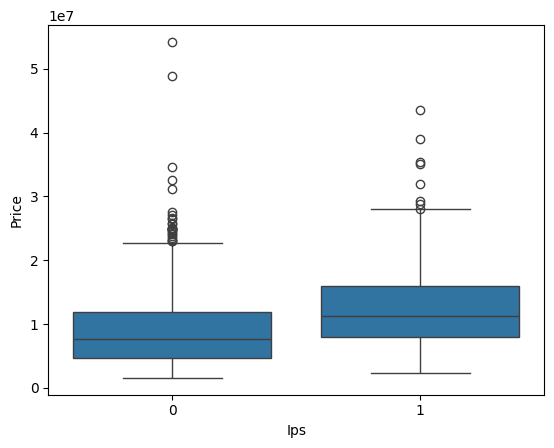

In [31]:
sns.boxplot(x='Ips', y='Price', data=df)

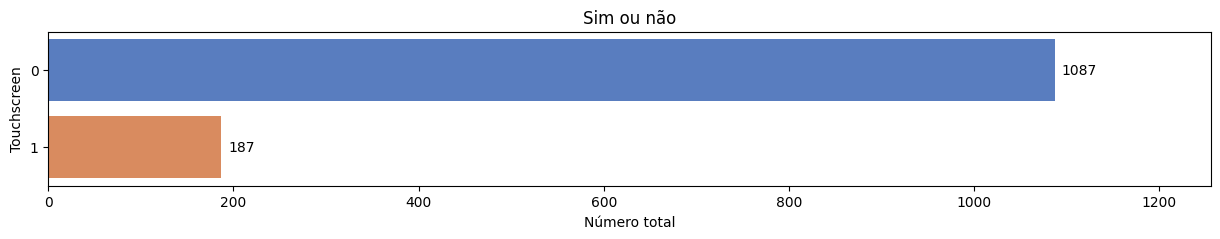

In [32]:
countplot('Touchscreen','Sim ou não',2)

<Axes: xlabel='Touchscreen', ylabel='Price'>

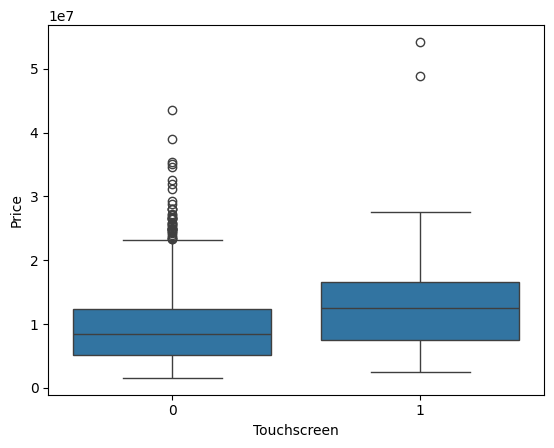

In [33]:
sns.boxplot(x='Touchscreen', y='Price', data=df)

### CPU

In [34]:
df['CPU'].value_counts()

CPU
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     131
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

Essa coluna está com muitos elementos muito parecidos porém com algumas poucas informações diferente. Vamos manipular essas informações para agrupar essas informações parecidas.

In [35]:
def join_elements(x):
    if x[0] == 'AMD':
        return ' '.join(x[:2]) + ' ' + x[-1]
    elif x[0] == 'Intel':
        return ' '.join(x[:3]) + ' ' + x[-1]
    else:
        return ' '.join(x[:2]) + ' ' + x[-1]

In [36]:
df['CPU'].str.split().apply(join_elements).value_counts()

CPU
Intel Core i5 2.5GHz     223
Intel Core i7 2.8GHz     160
Intel Core i7 2.7GHz     150
Intel Core i5 2.3GHz      77
Intel Core i5 1.6GHz      75
                        ... 
Intel Core i5 1.3GHz       1
AMD FX 3GHz                1
Intel Core i5 2.9GHz       1
Intel Core i3 2.2GHz       1
Samsung Cortex 2.0GHz      1
Name: count, Length: 79, dtype: int64

Diminuí de 118 valores únicos para 79 somente considerando o fabricante e a família do processador, além da velocidade.

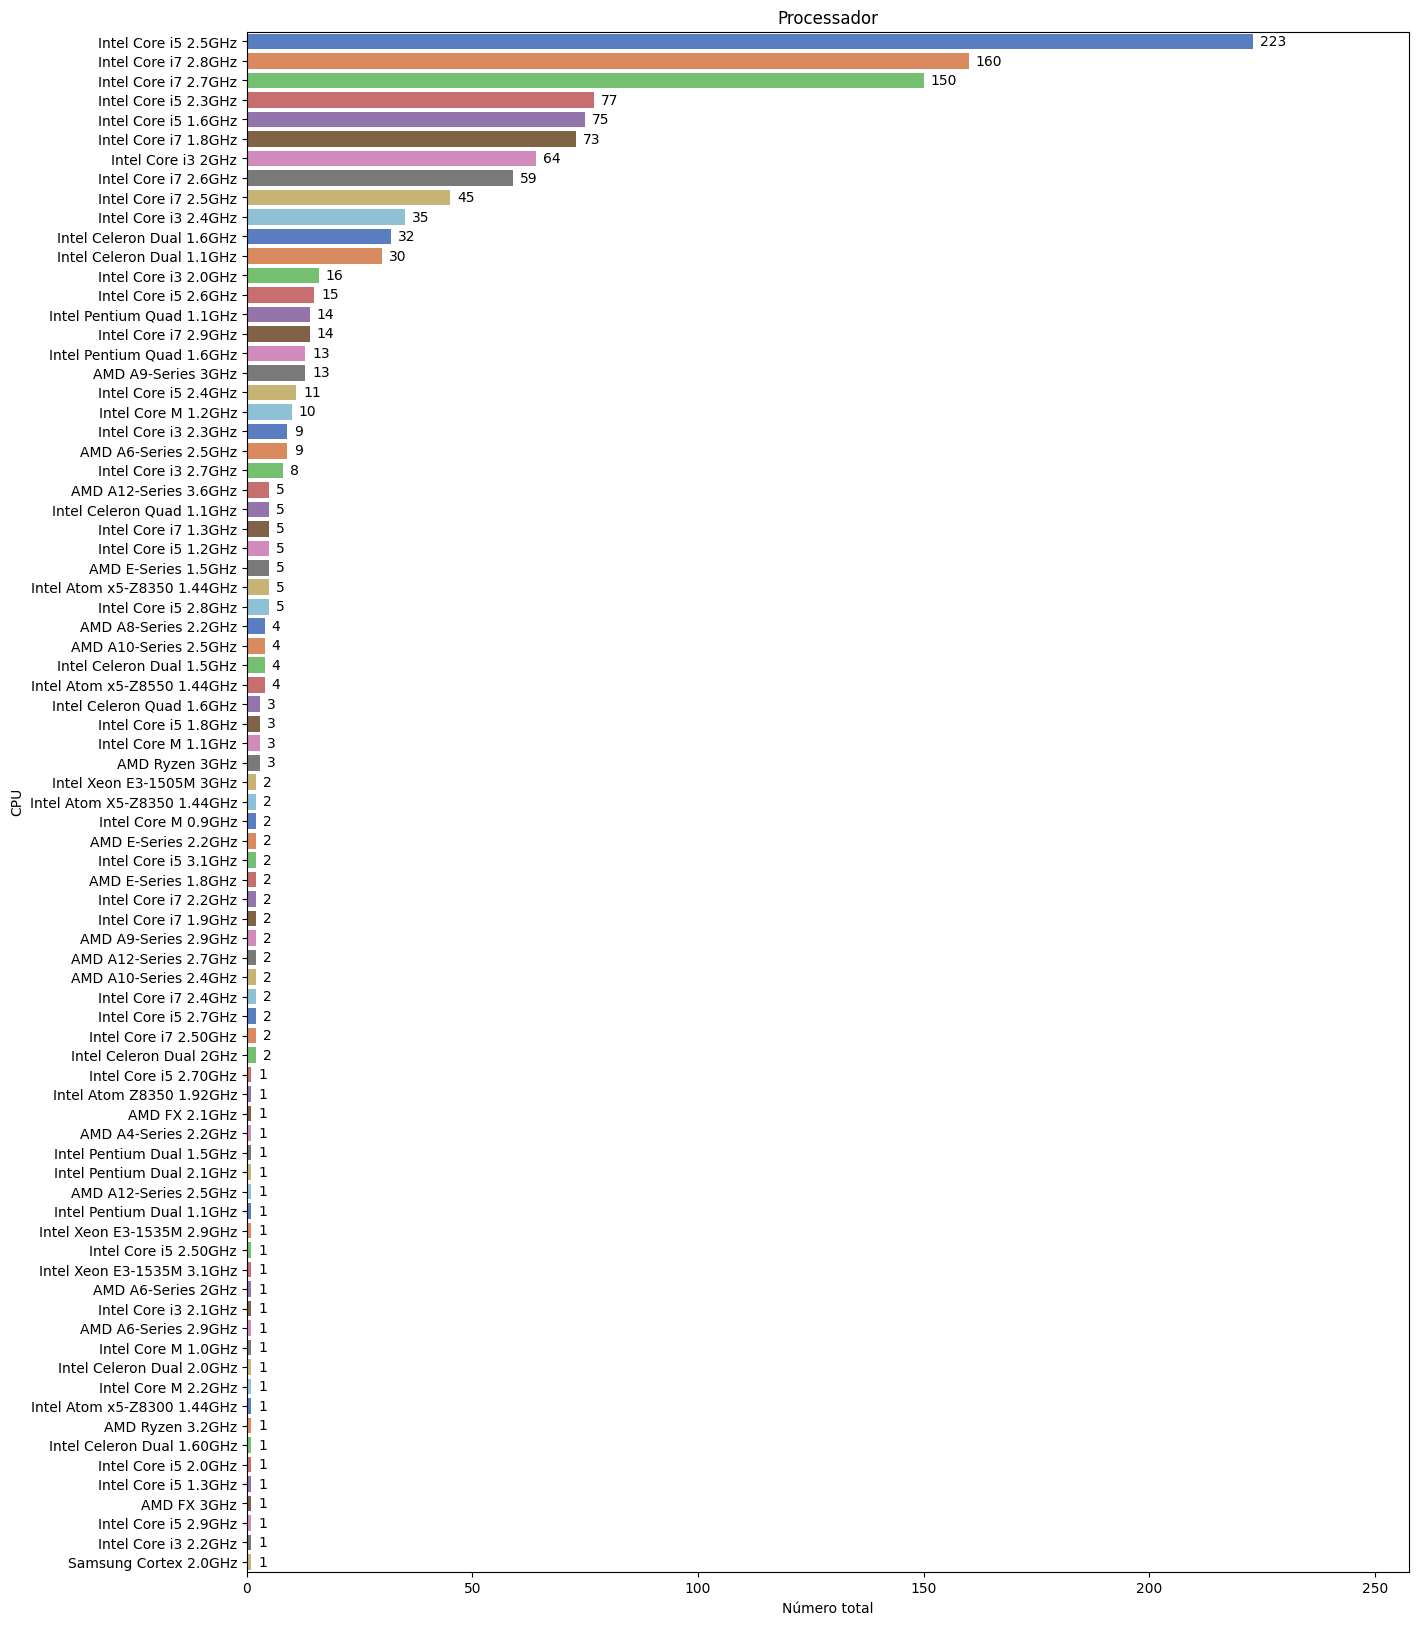

In [37]:
df['CPU'] = df['CPU'].str.split().apply(join_elements)
countplot('CPU','Processador',20)

<Axes: xlabel='CPU', ylabel='Price'>

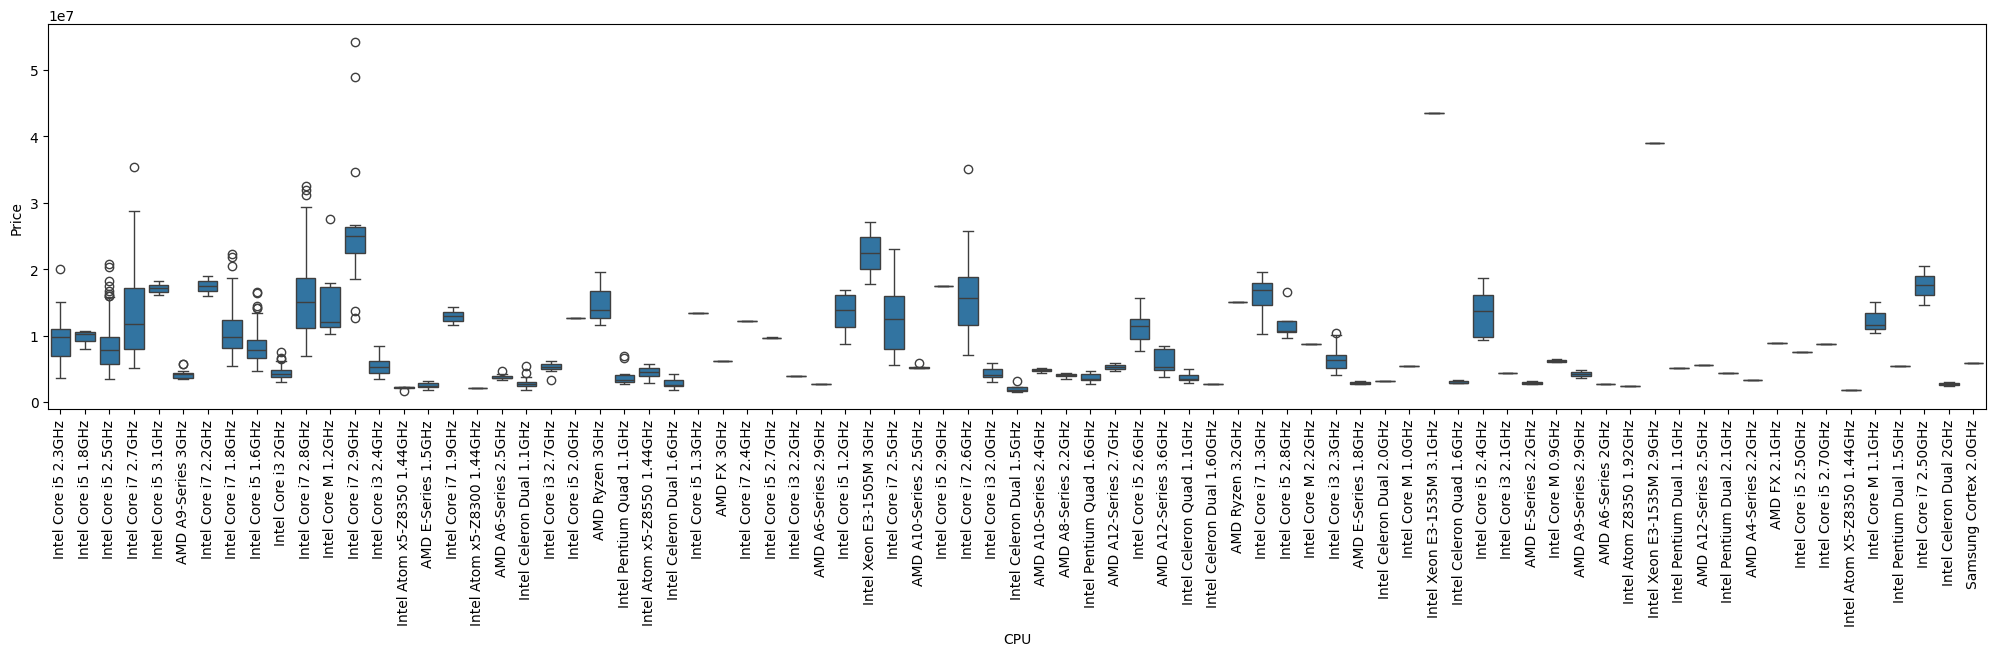

In [38]:
plt.figure(figsize=(25, 5))
plt.xticks(rotation='vertical')
sns.boxplot(x='CPU', y='Price', data=df)

### RAM

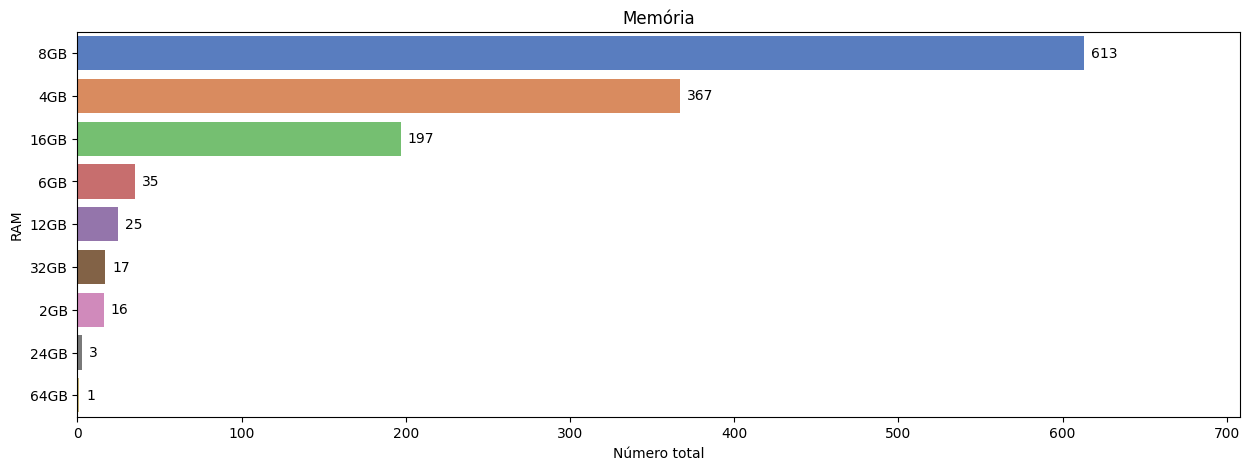

In [39]:
countplot('RAM','Memória',5)

Vamos retirar o GB e transformar para int

In [40]:
df['RAM']=df['RAM'].str.replace('GB','')
df['RAM'] = df['RAM'].astype('int')

<Axes: xlabel='RAM', ylabel='Price'>

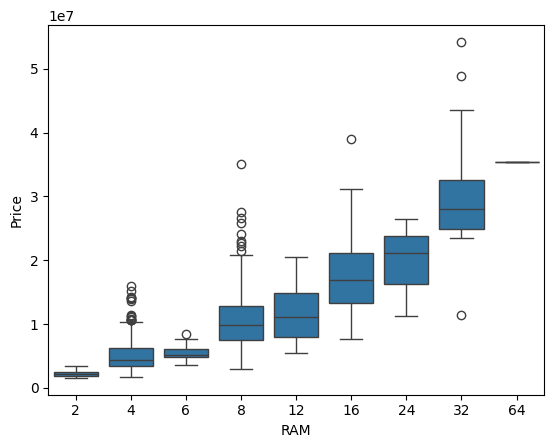

In [41]:
sns.boxplot(x='RAM', y='Price', data=df)

### Storage

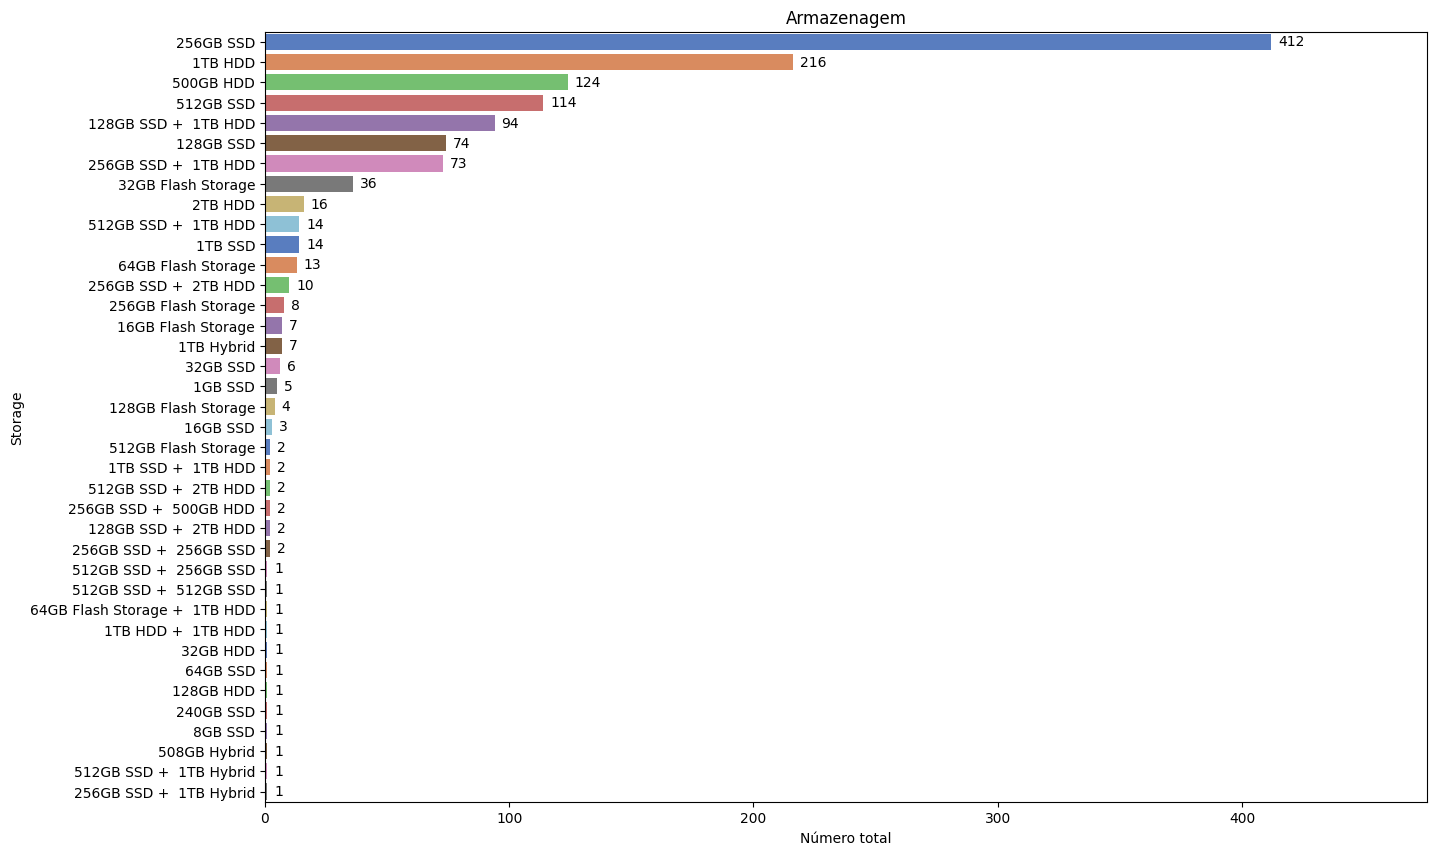

In [42]:
countplot('Storage','Armazenagem',10)

Podemos observar quatro tipos de amazenamento, HDD, SSD, Hybrid e Flash. Podemos separar esses tipos em novas colunas do DF além de somar os valores para os notebooks com 2 hds

In [43]:
df["Storage"] = df["Storage"].str.replace('GB','')
df["Storage"] = df["Storage"].str.replace('TB','000') #Vou adotar o GB como padrão
hds = df["Storage"].str.split("+", n = 1, expand = True)
hd1 = hds[0].str.split(" ", n=1, expand = True)
hd2 = hds[1].str.strip().str.split(" ", n=1, expand = True)
vhd1 = hd1[0].astype(int)
vhd2 = hd2[0].astype(float)

In [44]:
df['ssd'] = 0
df['hdd'] = 0
df['flash'] = 0
df['hybrid'] = 0

for i in range(0, len(df)):
  if 'SSD' in hd1.loc[i,1]:
    df.at[i,'ssd'] +=  vhd1.loc[i]
  elif 'Flash Storage' in hd1.loc[i,1]:
    df.at[i,'flash'] +=  vhd1.loc[i]
  elif 'HDD' in hd1.loc[i,1]:
    df.at[i,'hdd'] +=  vhd1.loc[i]
  elif 'Hybrid' in hd1.loc[i,1]:
    df.at[i,'hybrid'] +=  vhd1.loc[i]
  if 'SSD' in str(hd2.loc[i,1]):
    df.at[i,'ssd'] +=  vhd2.loc[i]
  elif 'Flash Storage' in str(hd2.loc[i,1]):
    df.at[i,'flash'] +=  vhd2.loc[i]
  elif 'HDD' in str(hd2.loc[i,1]):
    df.at[i,'hdd'] +=  vhd2.loc[i]
  elif 'Hybrid' in str(hd2.loc[i,1]):
    df.at[i,'hybrid'] +=  vhd2.loc[i]


In [45]:
df.drop('Storage', axis=1, inplace=True)

<Axes: xlabel='ssd', ylabel='Price'>

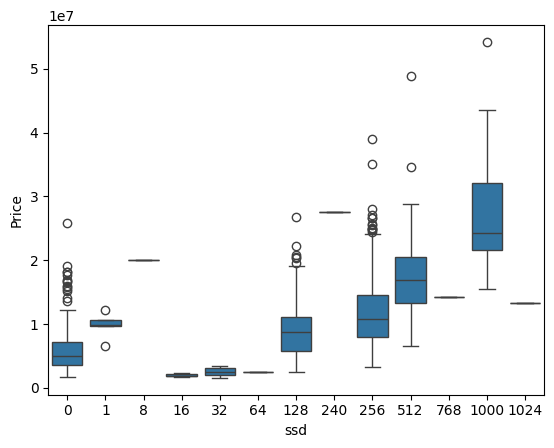

In [46]:
sns.boxplot(x='ssd', y='Price', data=df)

<Axes: xlabel='hdd', ylabel='Price'>

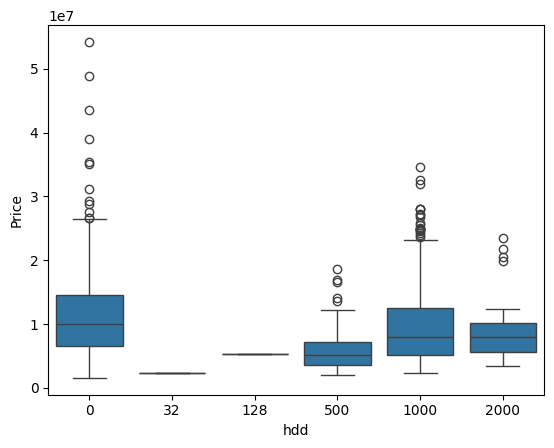

In [47]:
sns.boxplot(x='hdd', y='Price', data=df)

<Axes: xlabel='flash', ylabel='Price'>

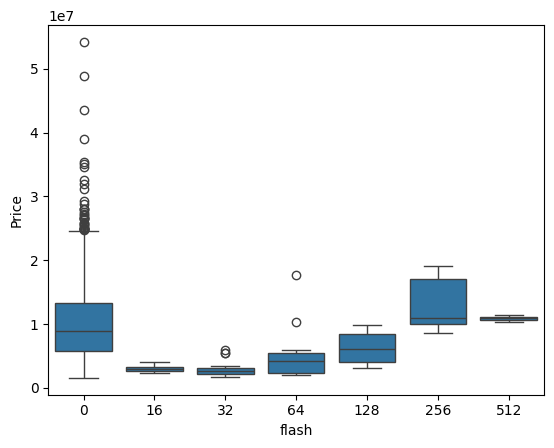

In [48]:
sns.boxplot(x='flash', y='Price', data=df)

<Axes: xlabel='hybrid', ylabel='Price'>

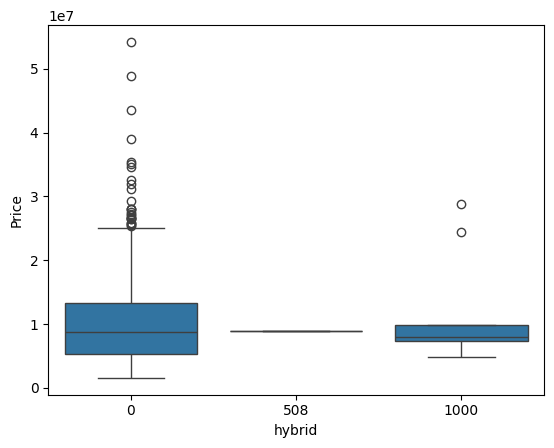

In [49]:
sns.boxplot(x='hybrid', y='Price', data=df)

### GPU

In [50]:
df['GPU'].value_counts()

GPU
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

O mesmo acontece aqui com os nomes da GPU, muitas informações que podem ser resumidas sem uma perca grande de informação.

Vamos utilizar a marca e o número da placa, que na maioria estão no primeiro e último respectivamente. Também vamos substituir alguns termos que estão mal definidos ou atrapalhando a simplificação.

In [51]:
df['GPU'] = df['GPU'].str.replace('GTX', '')
df['GPU'] = df['GPU'].str.replace('Graphics', '')
df['GPU'] = df['GPU'].str.replace('Pro', '')
df['GPU'] = df['GPU'].str.replace('Ti', '')
df['GPU'] = df['GPU'].str.replace('SLI', '')
df['GPU'] = df['GPU'].str.replace('MX', '')
df['GPU'] = df['GPU'].str.replace('0M', '0')
df['GPU'] = df['GPU'].str.replace('<U+039C>', '0')
df['GPU'].str.split().apply(lambda x: f"{x[0]} {x[-1]}").value_counts()

GPU
Intel 620         349
Intel 520         181
Nvidia 1050       100
Nvidia 940         54
Nvidia 1060        49
                 ... 
Intel 530           1
Intel Iris          1
AMD R17M-M1-70      1
AMD W5130           1
ARM MP4             1
Name: count, Length: 74, dtype: int64

In [52]:
df['GPU'] = df['GPU'].str.split().apply(lambda x: f"{x[0]} {x[-1]}")

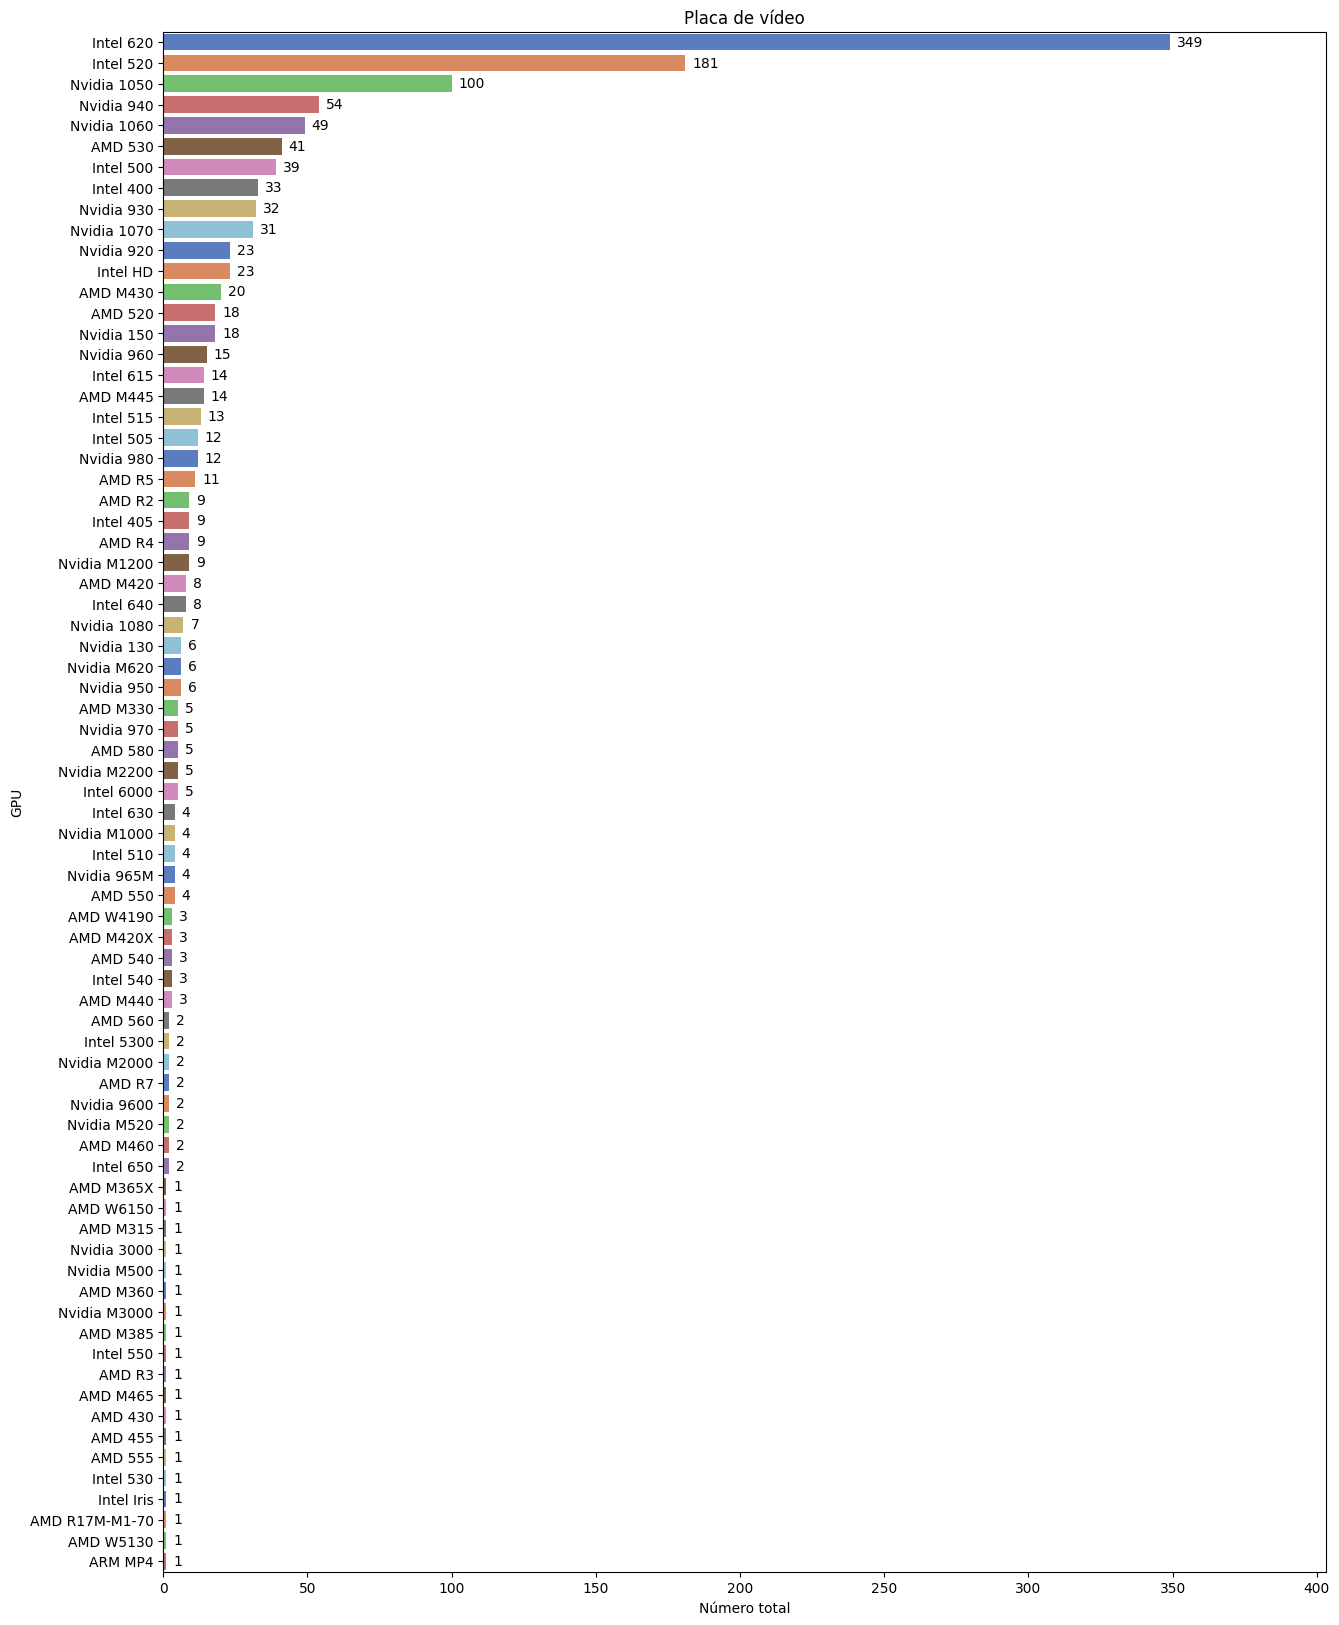

In [53]:
countplot('GPU','Placa de vídeo',20)

<Axes: xlabel='GPU', ylabel='Price'>

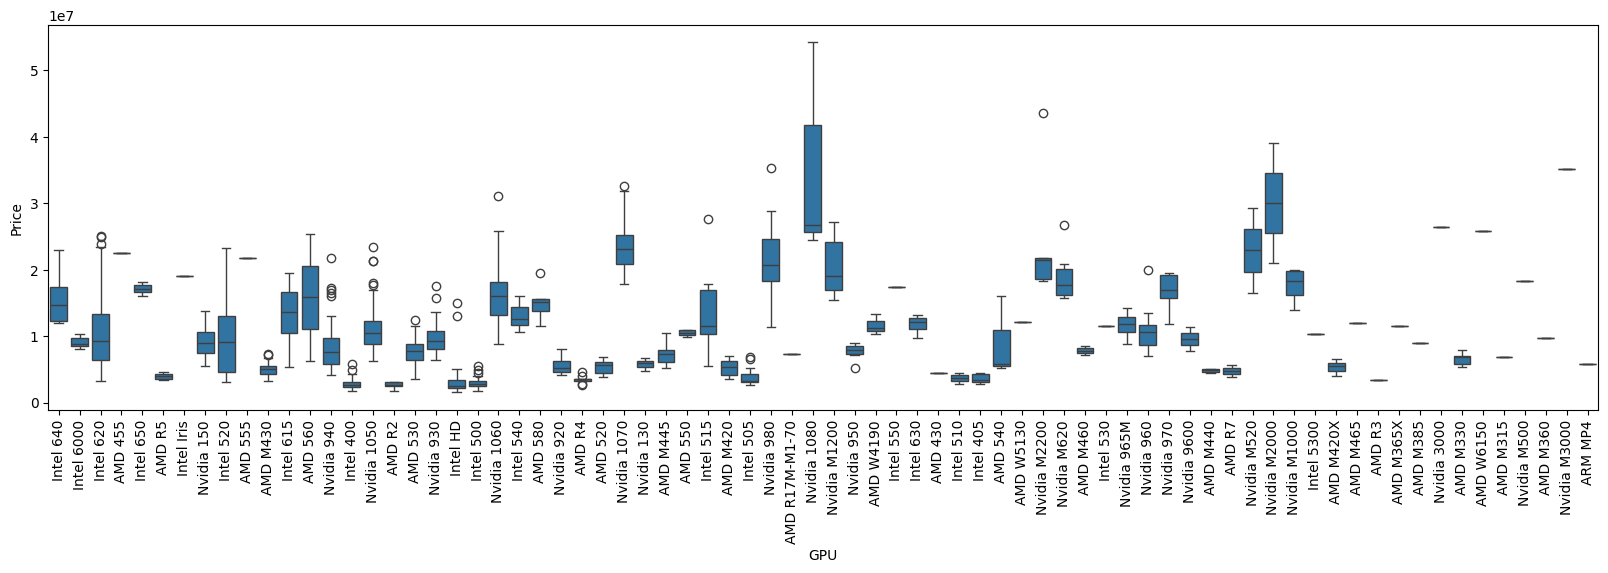

In [54]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation='vertical')
sns.boxplot(x='GPU', y='Price', data=df)

### Operating System

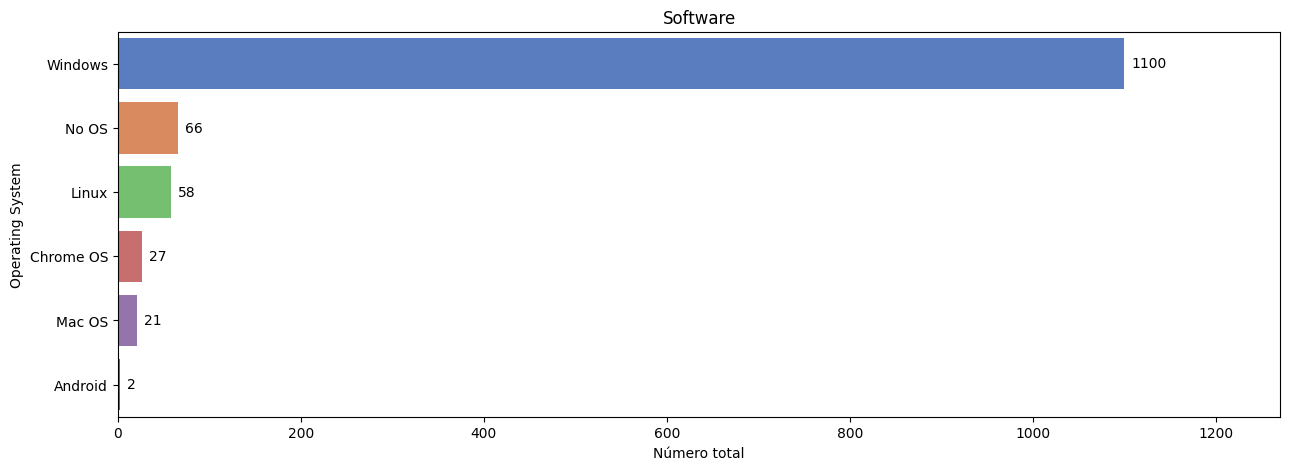

In [55]:
df['Operating System'] = df['Operating System'].str.replace('macOS', 'Mac OS')
countplot('Operating System','Software',5)

<Axes: xlabel='Operating System', ylabel='Price'>

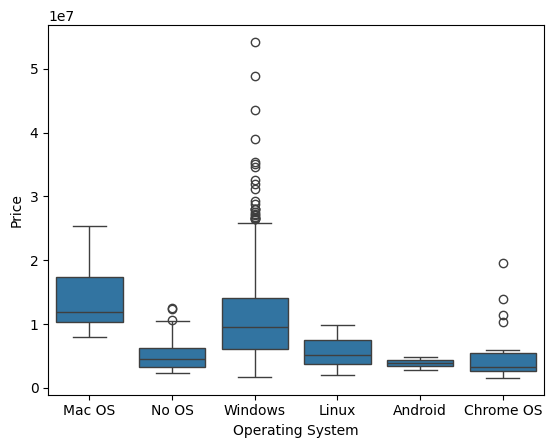

In [56]:
sns.boxplot(x='Operating System', y='Price', data=df)

### Operating System Version

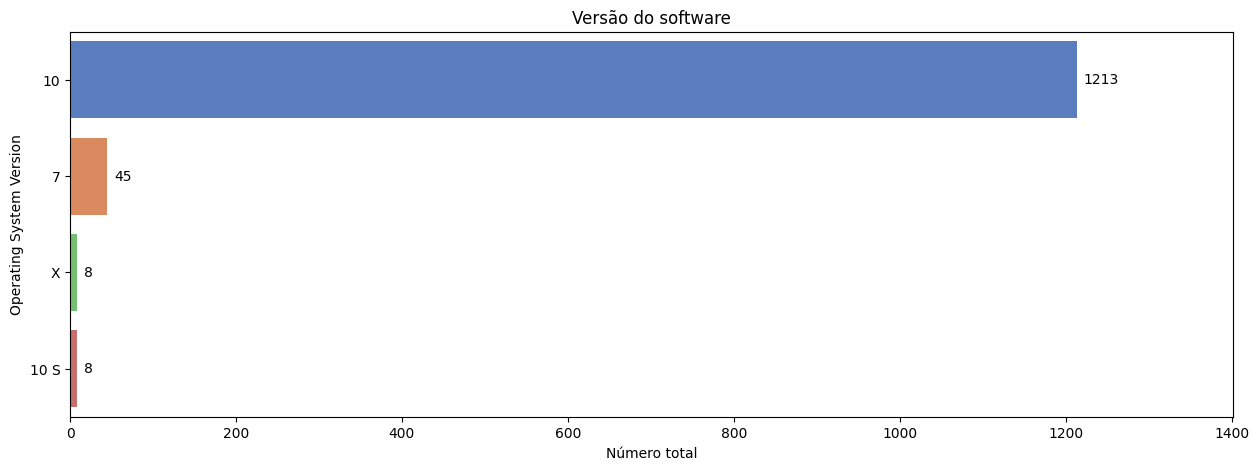

In [57]:
countplot('Operating System Version','Versão do software',5)

Os registros de versão dos softwares são dominados pelo windows, não serão relevantes para nossa previsão dos preços.

In [58]:
df.drop('Operating System Version',axis=1,inplace=True)

### Weight

In [59]:
df['Weight'].value_counts()

Weight
2.2kg     117
2.1kg      58
2.4kg      42
2.5kg      38
2.3kg      36
         ... 
1.14kg      1
3.8kg       1
1.19kg      1
1.55kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

Vamos selecionar somente os valores e arredondá-los para até uma casa decimal

In [60]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].str.replace('s', '')

In [61]:
df['Weight'] = df['Weight'].astype('float').round(1)

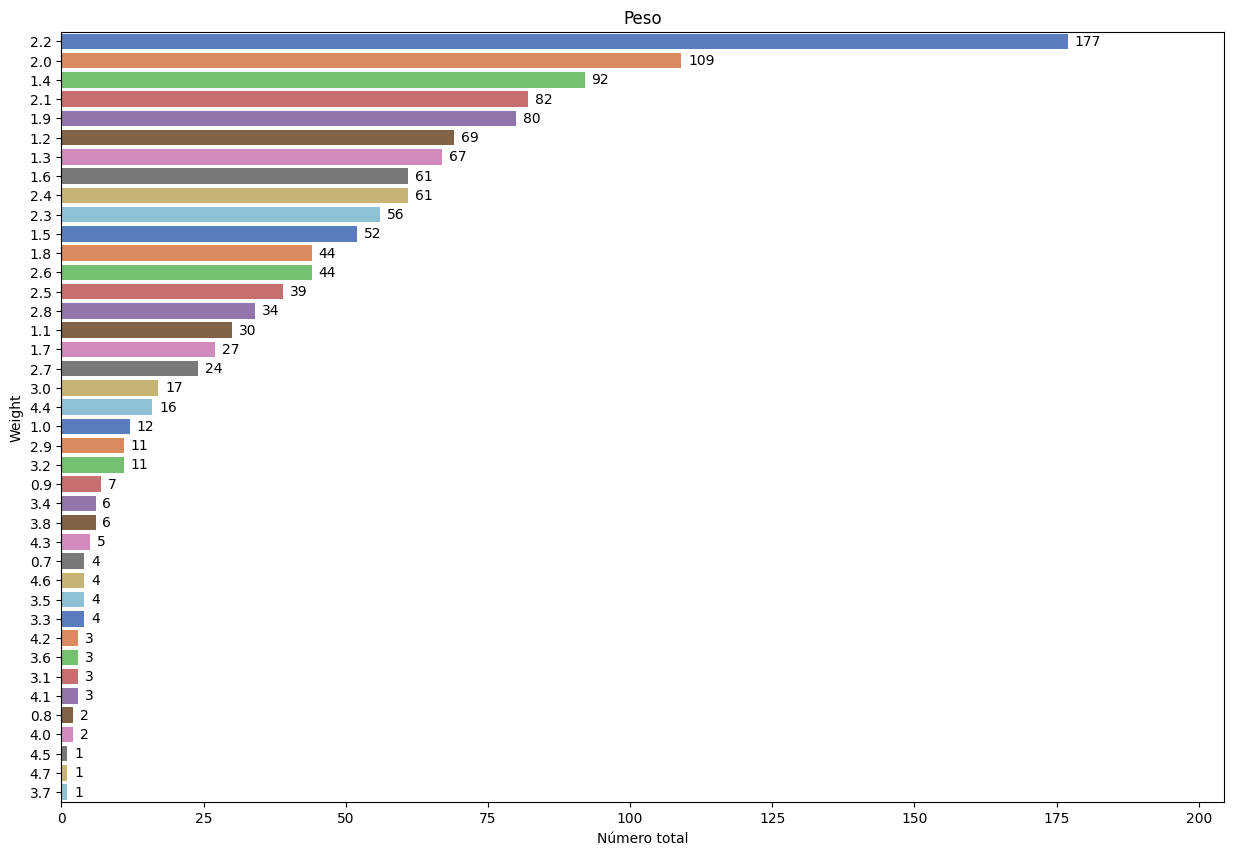

In [62]:
countplot('Weight','Peso',10)

## Price

Analisando o histograma de Price

<Axes: xlabel='Price', ylabel='Count'>

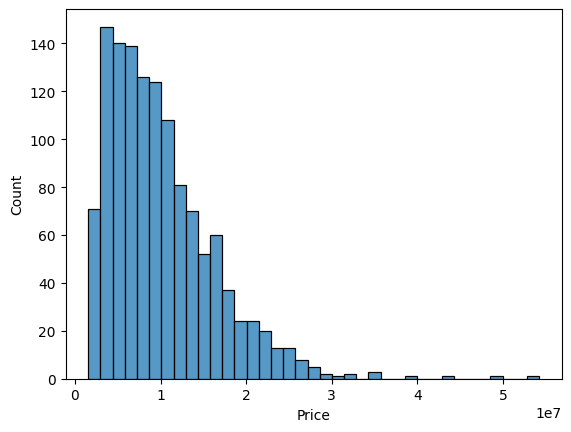

In [63]:
sns.histplot(x='Price',data=df)

Os valores estão com uma distribuição assimétrica, lembrando uma distribuição lognormal. Vou aplicar o log de Price para obeter uma distribuição normal

<Axes: xlabel='Price', ylabel='Count'>

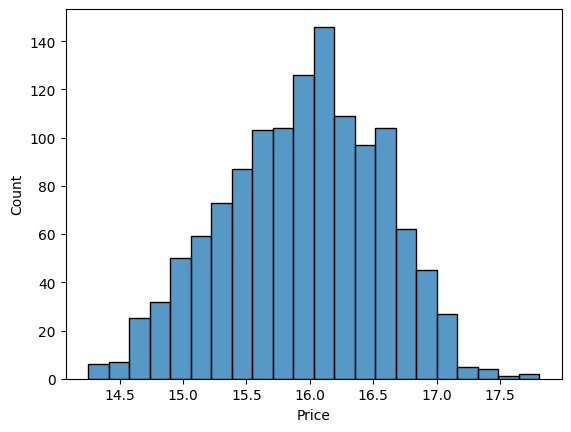

In [64]:
sns.histplot(np.log(df['Price']))

In [65]:
df['Price'] = np.log(df['Price'])

## Codificação de colunas categóricas

As colunas Category e Operating System possuem poucos valores únicos, podemos transformar essas colunas em valores usando a função getdummys

In [66]:
df = pd.concat([df, pd.get_dummies(df[['Category', 'Operating System']], prefix=None, dtype=int)], axis=1)
df.drop(columns=['Category', 'Operating System'], axis=1, inplace=True)

Na outras colunas com string, podemos usar a biblioteca LabelEncoder e transformar essas colunas

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['CPU'] = le.fit_transform(df['CPU'])
df['GPU'] = le.fit_transform(df['GPU'])
df['Pixels'] = le.fit_transform(df['Pixels'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 1274 non-null   int32  
 1   Screen Size                  1274 non-null   float64
 2   CPU                          1274 non-null   int32  
 3   RAM                          1274 non-null   int32  
 4   GPU                          1274 non-null   int32  
 5   Weight                       1274 non-null   float64
 6   Price                        1274 non-null   float64
 7   Touchscreen                  1274 non-null   int32  
 8   Ips                          1274 non-null   int32  
 9   Pixels                       1274 non-null   int32  
 10  ssd                          1274 non-null   int64  
 11  hdd                          1274 non-null   int64  
 12  flash                        1274 non-null   int64  
 13  hybrid                 

In [70]:
df.head()

,Manufacturer,Screen Size,CPU,RAM,GPU,Weight,Price,Touchscreen,Ips,Pixels,...,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation,Operating System_Android,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,Operating System_Windows
0,1,13.3,49,8,46,1.4,16.293101,0,1,10,...,0,0,1,0,0,0,0,1,0,0
1,1,13.3,47,8,42,1.3,15.894124,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,7,15.6,52,8,44,1.9,15.447277,0,0,3,...,0,1,0,0,0,0,0,0,1,0
3,1,15.4,67,16,1,1.8,16.931822,0,1,12,...,0,0,1,0,0,0,0,1,0,0
4,1,13.3,58,8,47,1.4,16.590447,0,1,10,...,0,0,1,0,0,0,0,1,0,0


In [71]:
df.corr()['Price'].sort_values(ascending=False)

Price                          1.000000
RAM                            0.680511
ssd                            0.656844
CPU                            0.641928
Pixels                         0.527864
Category_Gaming                0.363366
GPU                            0.361630
Category_Ultrabook             0.307240
Operating System_Windows       0.294067
Ips                            0.279304
Category_Workstation           0.206992
Touchscreen                    0.191583
Weight                         0.151697
Manufacturer                   0.139306
Operating System_Mac OS        0.093617
Category_2 in 1 Convertible    0.090014
Screen Size                    0.038563
hybrid                         0.022731
flash                         -0.050915
Operating System_Android      -0.052136
hdd                           -0.099978
Category_Netbook              -0.146426
Operating System_Linux        -0.177671
Operating System_Chrome OS    -0.180921
Operating System_No OS        -0.215422


## Separando os dados para treino e teste

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=7)

## Modelos de regressão

Vamos utilizar uma função para plotar os resultados

In [74]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 20
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.legend()
    plt.xlabel('Log do Preço')
    plt.ylabel('Proporção de computadores')
    plt.show()
    plt.close()

### Regressão linear

In [75]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso

In [76]:
lr=LinearRegression()
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)

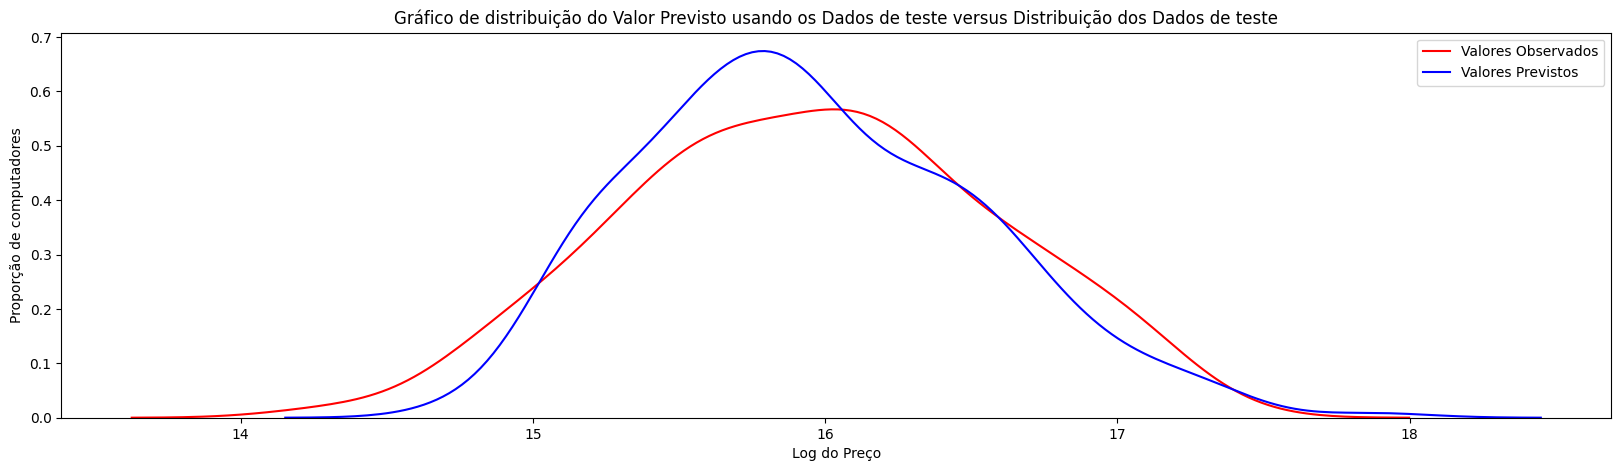

In [77]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhat, "Valores Observados", "Valores Previstos", Title)

In [78]:
print(f"O R^2 do teste {lr.score(x_test, y_test)} e o RMSE {mean_squared_error(y_test,yhat)}")

O R^2 do teste 0.8256987022893177 e o RMSE 0.06895222032669755


#### Ridge Regression

In [79]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
yhatRR = RigeModel.predict(x_test)

In [80]:
print(f"O R^2 do teste {r2_score(y_test, yhatRR)} e o RMSE {mean_squared_error(y_test,yhatRR)}")

O R^2 do teste 0.82575559900403 e o RMSE 0.06892971243455773


##### Grid search

Definir o hyperparâmetro alpha utilizando o Grid Search

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
Alpha = 0.01 * np.array(range(0,10001,1))
parameters1= [{'alpha': Alpha}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_train, y_train)
BestRR=Grid1.best_estimator_

In [83]:
yhatGS = Grid1.predict(x_test)

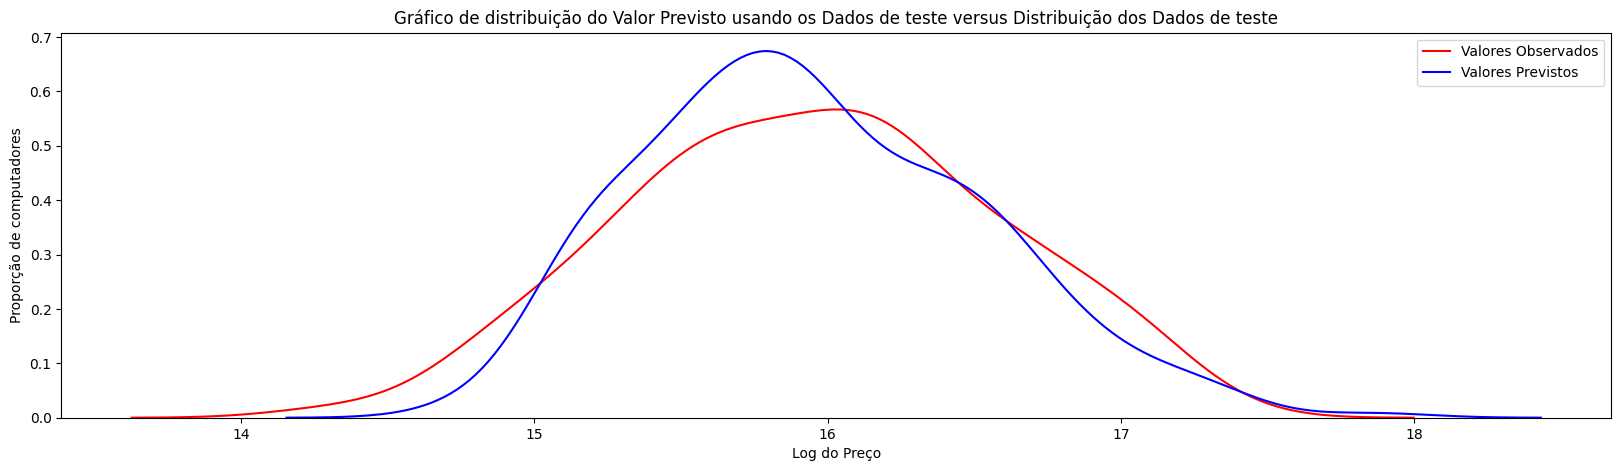

In [84]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatGS, "Valores Observados", "Valores Previstos", Title)

In [85]:
print(f"O R^2 do teste {r2_score(y_test, yhatGS)} e o RMSE {mean_squared_error(y_test,yhatGS)}")

O R^2 do teste 0.8261588794849164 e o RMSE 0.06877017785313601


In [86]:
Grid1.best_params_

{'alpha': 0.96}

In [87]:
Lss = Lasso()
Lss.fit(x_train,y_train)
yhatlss = Lss.predict(x_test)

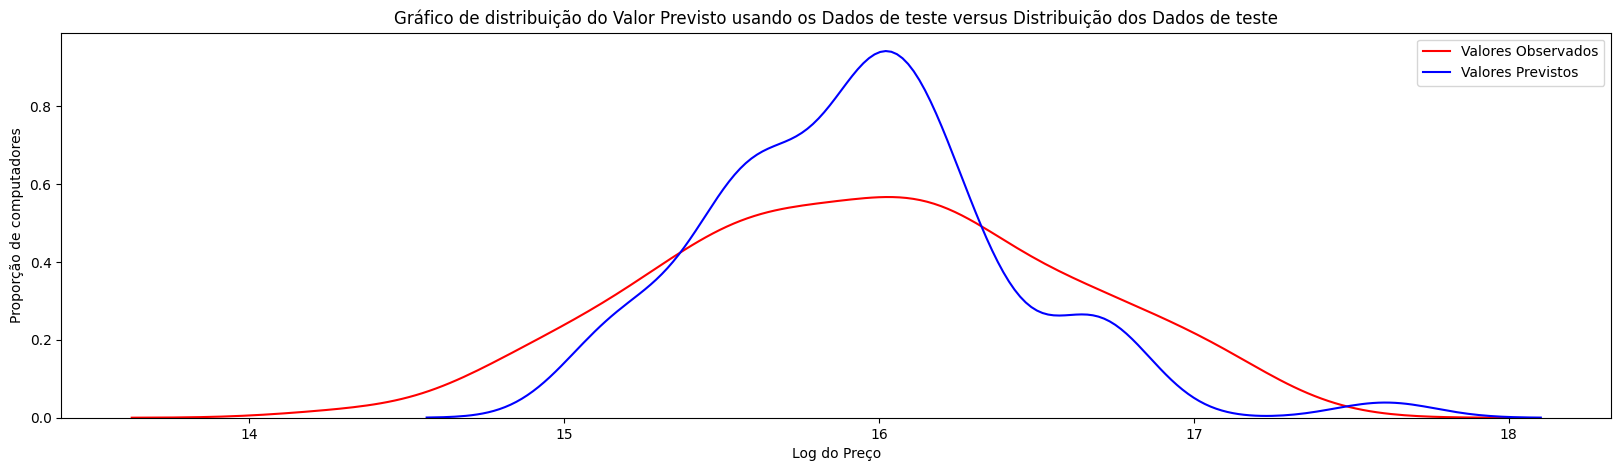

In [88]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatlss, "Valores Observados", "Valores Previstos", Title)

In [89]:
print(f"O R^2 do teste {r2_score(y_test, yhatlss)} e o RMSE {mean_squared_error(y_test,yhatlss)}")

O R^2 do teste 0.6506263190198693 e o RMSE 0.13820947602626438


## Modelos não lineares

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
RF = RandomForestRegressor(max_depth= 4 , max_features= 6)
RF.fit(x_train,y_train)
yhatrf = RF.predict(x_test)

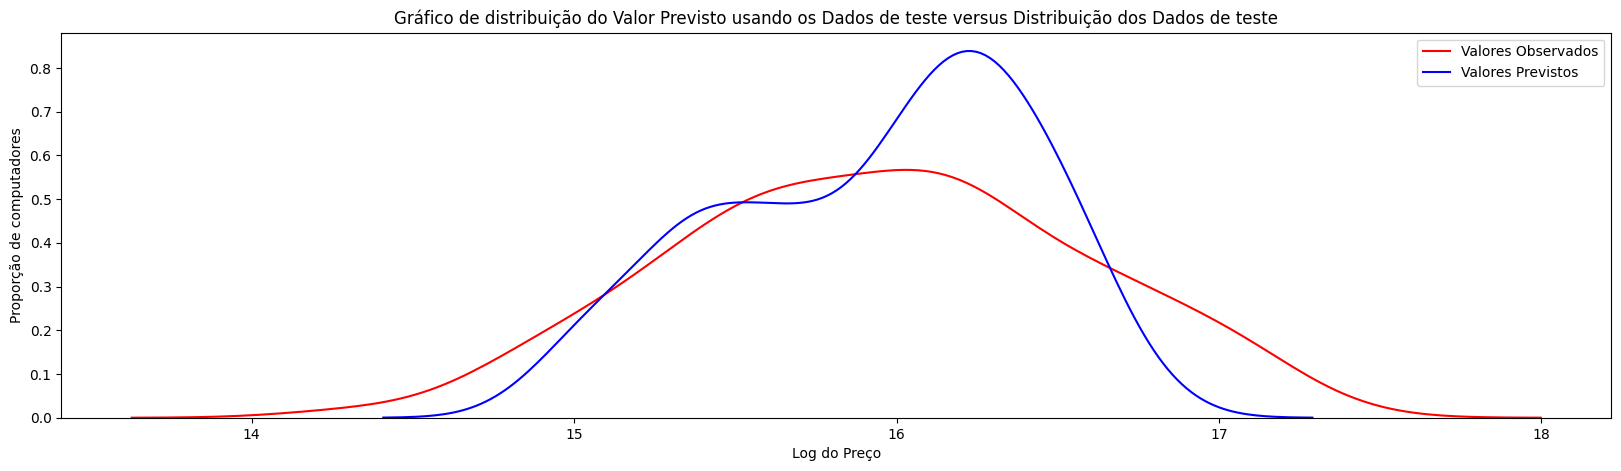

In [92]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatrf, "Valores Observados", "Valores Previstos", Title)

In [93]:
print(f"O R^2 do teste {r2_score(y_test, yhatrf)} e o RMSE {mean_squared_error(y_test,yhatrf)}")

O R^2 do teste 0.8225493788293495 e o RMSE 0.070198067878861


##### Grid Search

In [94]:
RF2 = RandomForestRegressor()
parameters2 = {
    'max_depth': [int(x) for x in np.linspace(10, 50, num = 6)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
}


Grid2 = GridSearchCV(estimator = RF2, param_grid = parameters2, cv = 5)
Grid2.fit(x_train,y_train)

print(Grid2.best_params_)

yhatrf_gs=Grid2.predict(x_test)

{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 369}


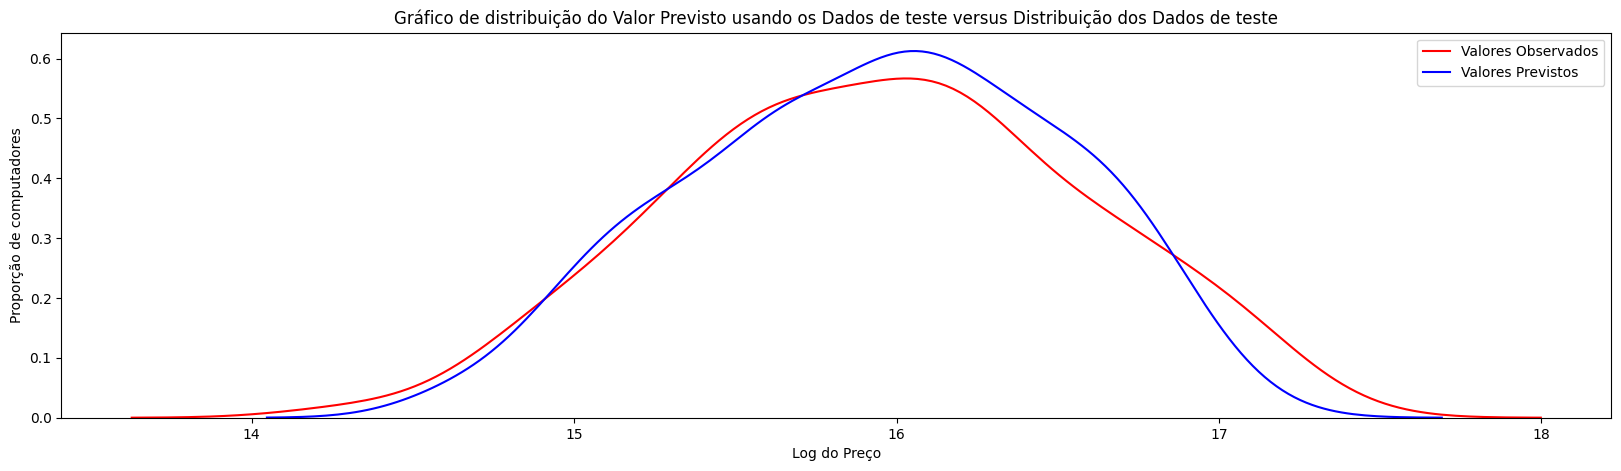

In [95]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatrf_gs, "Valores Observados", "Valores Previstos", Title)

In [96]:
print(f"O R^2 do teste {r2_score(y_test, yhatrf_gs)} e o RMSE {mean_squared_error(y_test,yhatrf_gs)}")

O R^2 do teste 0.9121403702824253 e o RMSE 0.034756577407495624


### Gradiente Boosting

In [97]:
from sklearn.ensemble import  GradientBoostingRegressor

In [98]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
yhatgb = GB.predict(x_test)

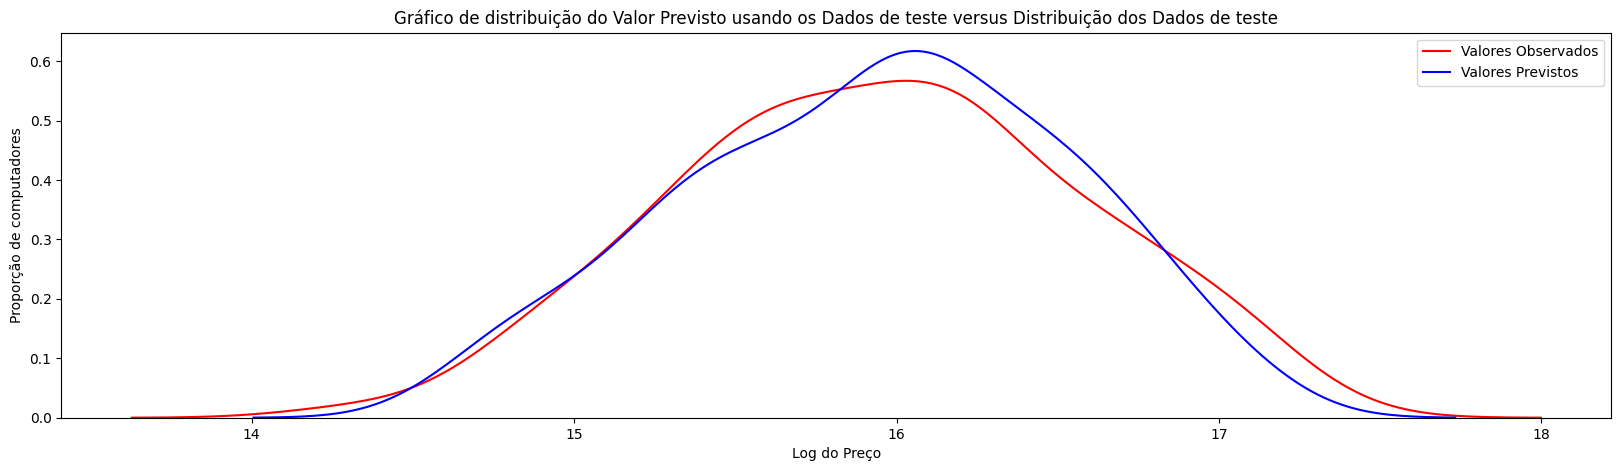

In [99]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatgb, "Valores Observados", "Valores Previstos", Title)

In [100]:
print(f"O R^2 do teste {r2_score(y_test, yhatgb)} e o RMSE {mean_squared_error(y_test,yhatgb)}")

O R^2 do teste 0.9087024439752244 e o RMSE 0.03611659397257338


In [101]:
GB3 = GradientBoostingRegressor()
parameters3 = {
    'max_depth':range(5,16,2), 
    'min_samples_split':range(200,1001,200)
}
Grid3 = GridSearchCV(estimator = GB3, param_grid = parameters3, cv=5) 
Grid3.fit(x_train,y_train)

print(Grid3.best_params_)

yhatgb_gs=Grid3.predict(x_test)

{'max_depth': 13, 'min_samples_split': 200}


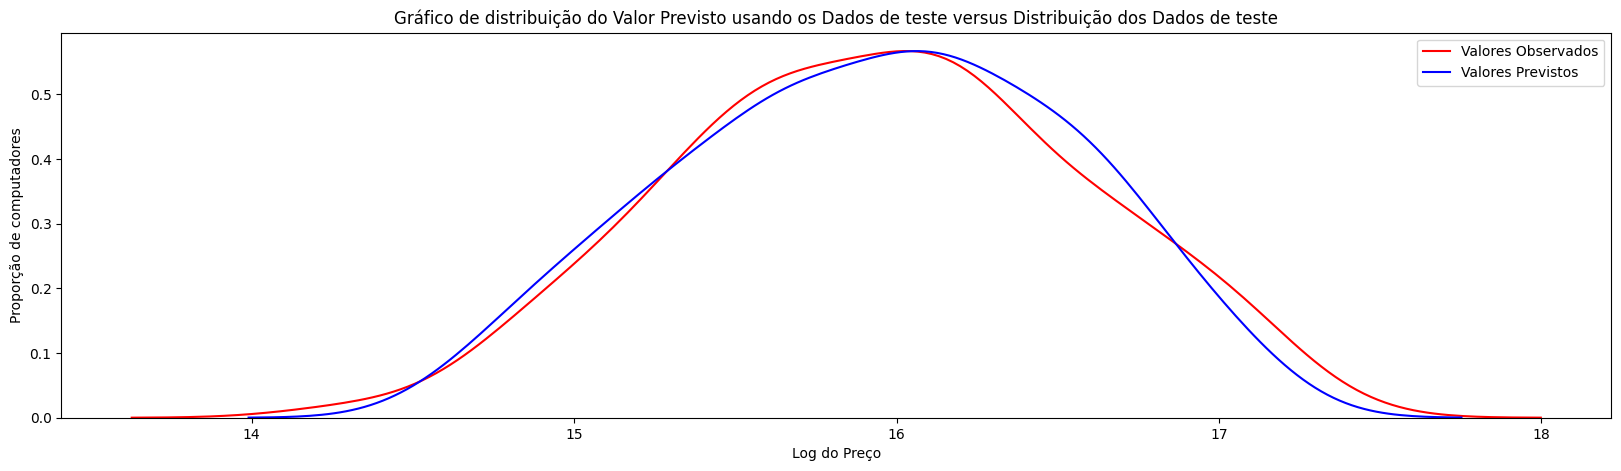

In [102]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatgb_gs, "Valores Observados", "Valores Previstos", Title)

In [103]:
print(f"O R^2 do teste {r2_score(y_test, yhatgb_gs)} e o RMSE {mean_squared_error(y_test,yhatgb_gs)}")

O R^2 do teste 0.9195252941603789 e o RMSE 0.03183515969565645


### XG Boosting

In [104]:
from xgboost import XGBRegressor

In [105]:
XG = XGBRegressor()
XG.fit(x_train,y_train)
yhatxg = XG.predict(x_test)

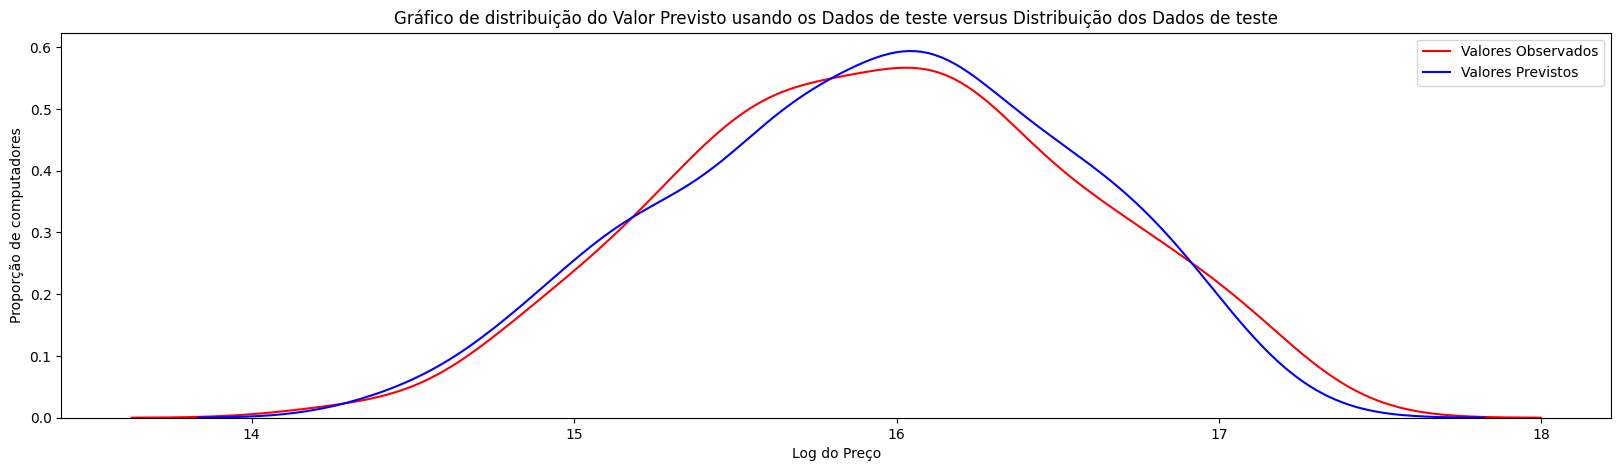

In [106]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatxg, "Valores Observados", "Valores Previstos", Title)

In [107]:
print(f"O R^2 do teste {r2_score(y_test, yhatxg)} e o RMSE {mean_squared_error(y_test,yhatxg)}")

O R^2 do teste 0.9145964221487836 e o RMSE 0.033784982636560365


In [108]:
GB4 = XGBRegressor()
parameters4 = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}
Grid4 = GridSearchCV(estimator = GB4, param_grid = parameters4, cv=5) 
Grid4.fit(x_train,y_train)

print(Grid4.best_params_)

yhatxg_gs=Grid4.predict(x_test)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


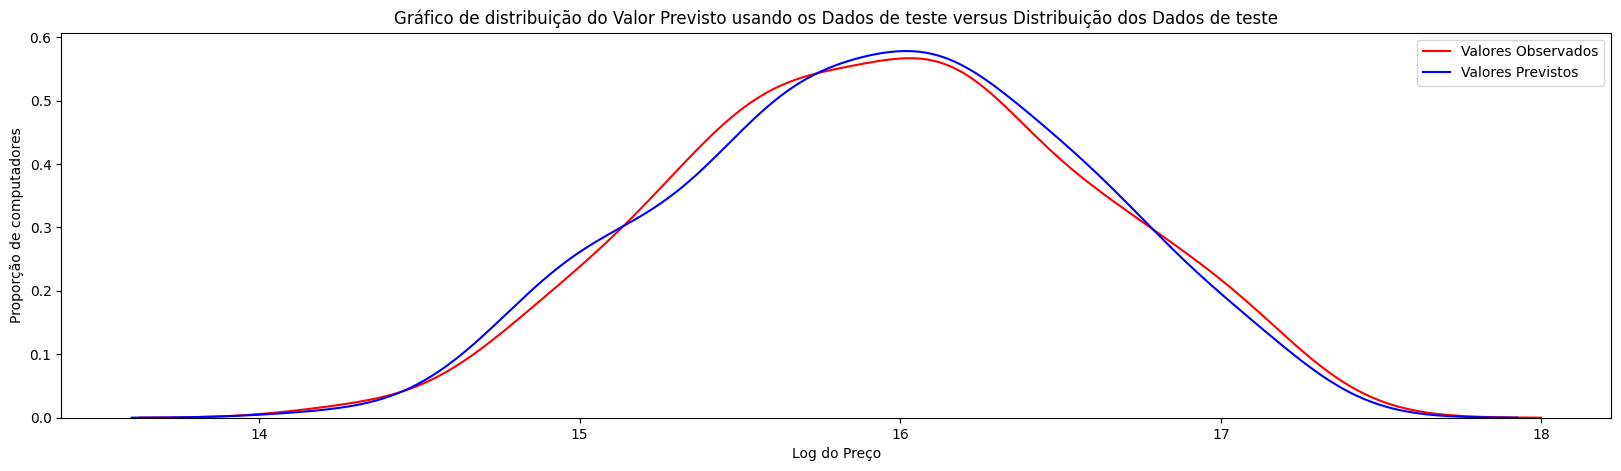

In [109]:
Title = 'Gráfico de distribuição do Valor Previsto usando os Dados de teste versus Distribuição dos Dados de teste'
DistributionPlot(y_test, yhatxg_gs, "Valores Observados", "Valores Previstos", Title)

In [110]:
print(f"O R^2 do teste {r2_score(y_test, yhatxg_gs)} e o RMSE {mean_squared_error(y_test,yhatxg_gs)}")

O R^2 do teste 0.9181884732379835 e o RMSE 0.03236399552183227
